In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
dataset = pd.read_csv('AAPL.csv',index_col="Date",parse_dates=True)

In [3]:
# for closing prices
training_set=dataset['Close']
training_set=pd.DataFrame(training_set)

start=1200 #1200
end=200 #200

training_set=training_set[-1*start:-1*end]
realvalue=training_set
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [25]:
training_set_scaled.shape

(1000, 1)

In [13]:
# Creating a data structure with 60 timesteps and 1 output
xdata= []
ydata = []
window=30
length=training_set_scaled.shape[0]-1
#print(training_set_scaled.head())
#column_idx = training_set_scaled.columns.get_loc('Close')

#training_set_scaled = np.array(training_set_scaled)

for i in range(window, length):
    xdata.append(training_set_scaled[i-window:i,:])
    ydata.append(training_set_scaled[i+1, :]) 
xdata, ydata = np.array(xdata), np.array(ydata)

per=0.9 #0.9
split=int(per*len(xdata))
X_test=xdata[split:,:]
Y_test=ydata[split:]
realvalue1=realvalue[-len(Y_test):]

X_train=xdata[:split,:]            
y_train=ydata[:split]

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

In [23]:
y_train

array([[8.10323881e-02],
       [7.87315179e-02],
       [5.32212753e-02],
       [5.85233858e-02],
       [5.31212153e-02],
       [4.84194049e-02],
       [4.68187247e-02],
       [4.20168442e-02],
       [4.46178345e-02],
       [5.71228357e-02],
       [5.69227857e-02],
       [6.96278370e-02],
       [7.22288972e-02],
       [7.70308477e-02],
       [8.88355789e-02],
       [1.02541010e-01],
       [1.02941180e-01],
       [1.03041240e-01],
       [1.10444181e-01],
       [1.12645071e-01],
       [1.06142451e-01],
       [1.18547392e-01],
       [1.19747902e-01],
       [1.22248902e-01],
       [1.30252133e-01],
       [8.66346787e-02],
       [7.84314079e-02],
       [8.69347887e-02],
       [8.08323481e-02],
       [7.71308377e-02],
       [1.07242901e-01],
       [1.11544621e-01],
       [1.13845581e-01],
       [1.13545391e-01],
       [1.05842351e-01],
       [1.13045241e-01],
       [1.15146072e-01],
       [1.06842731e-01],
       [1.07843121e-01],
       [1.23649452e-01],


In [14]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()



Using TensorFlow backend.


In [15]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True,activation='relu'))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences =True, activation='tanh'))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50,activation='relu'))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [16]:

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32,shuffle=True)


Epoch 1/100
872/872 [==============================] - 9s 10ms/step - loss: 0.0543
Epoch 2/100
872/872 [==============================] - 5s 6ms/step - loss: 0.0107
Epoch 3/100
872/872 [==============================] - 5s 6ms/step - loss: 0.0081
Epoch 4/100
872/872 [==============================] - 5s 6ms/step - loss: 0.0069
Epoch 5/100
872/872 [==============================] - 5s 6ms/step - loss: 0.0064
Epoch 6/100
872/872 [==============================] - 6s 7ms/step - loss: 0.0071
Epoch 7/100
872/872 [==============================] - 6s 7ms/step - loss: 0.0071
Epoch 8/100
872/872 [==============================] - 6s 7ms/step - loss: 0.0063
Epoch 9/100
872/872 [==============================] - 6s 7ms/step - loss: 0.0056
Epoch 10/100
872/872 [==============================] - 6s 7ms/step - loss: 0.0053
Epoch 11/100
872/872 [==============================] - 7s 8ms/step - loss: 0.0051
Epoch 12/100
872/872 [==============================] - 7s 8ms/step - loss: 0.0056
Epoch 13/100

872/872 [==============================] - 6s 7ms/step - loss: 0.0023
Epoch 100/100
872/872 [==============================] - 6s 7ms/step - loss: 0.0017


In [17]:
xt=X_test
xt = np.reshape(xt, (xt.shape[0], xt.shape[1], xt.shape[2]))
predicted_stock_price = regressor.predict(xt)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [18]:
pp=pd.DataFrame(predicted_stock_price)
pp1=pp.shift(-1)
prediction=np.where(pp<pp1,1,-1)

real=pd.DataFrame(realvalue1)
real1=real.shift(-1)
real1=np.where(real<real1,1,-1)

from sklearn.metrics import accuracy_score
score=accuracy_score(real1, prediction)
score

0.5773195876288659

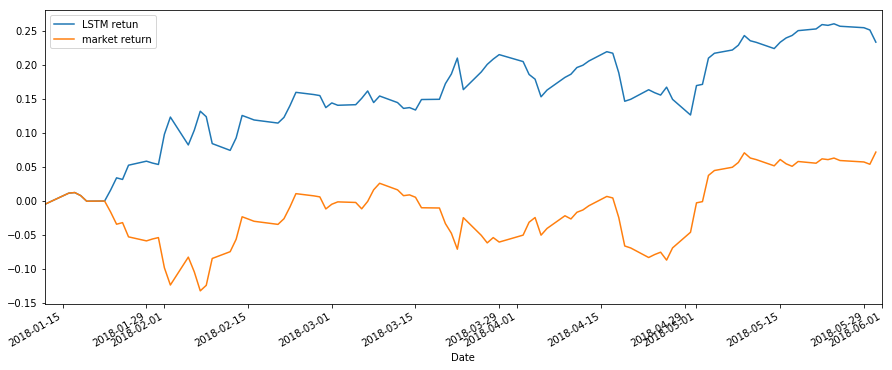

In [19]:
pp = np.array(pp)

data=real
data['pp']=pp

data['ret1']=np.log(data.Close/data.Close.shift(1))# calculating the every day return
data['ret1']=real['ret1'].shift(-1) # bringing the return to the previous day
data['p_sig']=prediction # prediction signal
data['v_p']=data.p_sig*real.ret1 #value prediction retun

# Plot the cumulative returns for single leaf in train dataset
data.v_p.cumsum().plot(figsize=(15,6))

# Plot the cumulative returns for full tree in train dataset
data.ret1.cumsum().plot(figsize=(15,6))
plt.legend(["LSTM retun", "market return"]);


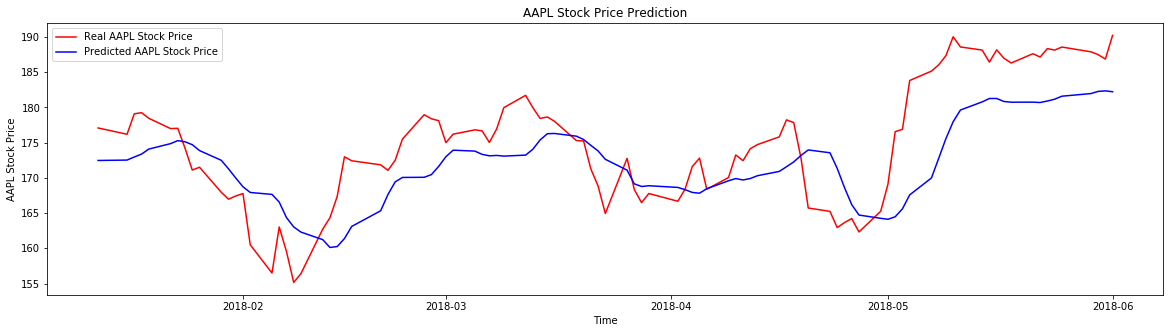

In [20]:
plt.figure(figsize=(20,5))
plt.plot(data['Close'], color = 'red', label = 'Real AAPL Stock Price')
plt.plot(data['pp'], color = 'blue', label = 'Predicted AAPL Stock Price')
plt.title('AAPL Stock Price Prediction')
#for i in j:
#    plt.axvline(x=i)
plt.xlabel('Time')
plt.ylabel('AAPL Stock Price')
plt.legend()
plt.show()